In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [2]:
# Dados

f = 4e9  # frequência em Hz
λ = 3e8/f  # comprimento de onda em metros
D = 4.5  # diâmetro da antena em metros

In [3]:
def ganho_antena_art22_5c12(D, λ, φ):
    """
    Calcula o ganho da antena de referência da estação terrena 
    conforme a nota 22.5C.12 do Radio Regulations, pág. 289.

    Parâmetros:
    D (float): Diâmetro da antena (m).
    λ (float): Comprimento de onda (m).
    φ (float ou np.ndarray): Ângulo fora do eixo da antena (graus).

    Retorna:
    float ou np.ndarray: Ganho da antena em dBi.
    """
    G1 = 2 + 15 * np.log10(D / λ)  # dBi
    Gmax = 7.7 + 20 * np.log10(D / λ)  # dBi
    φm = (20 * λ / D) * np.sqrt(Gmax - G1)  # graus
    φr = 15.85 * (D / λ) ** (-0.6)  # graus

    φ = np.asarray(φ)
    G = np.empty_like(φ, dtype=float)

    if D / λ >= 100:
        condition1 = (φ >= 0) & (φ < φm)
        condition2 = (φ >= φm) & (φ < φr)
        condition3 = (φ >= φr) & (φ < 20)
        condition4 = (φ >= 20) & (φ < 26.3)
        condition5 = (φ >= 26.3) & (φ < 48)
        condition6 = (φ >= 48) & (φ <= 180)
    elif (D / λ >= 42) & (D / λ < 100):
        condition1 = (φ >= 0) & (φ < φm)
        condition2 = (φ >= φm) & (φ < 100 * λ / D)
        condition3 = (φ >= 100 * λ / D) & (φ < 20)
        condition4 = (φ >= 20) & (φ < 26.3)
        condition5 = (φ >= 26.3) & (φ < 48)
        condition6 = (φ >= 48) & (φ <= 180)
    else:
        condition1 = (φ >= 0) & (φ < φm)
        condition2 = (φ >= φm) & (φ < 100 * λ / D)
        condition3 = (φ >= 100 * λ / D) & (φ < 48)
        condition4 = (φ >= 48) & (φ <= 180)
        condition5 = condition4  # Redefine condition5 to ensure it's always defined
        condition6 = condition4  # Redefine condition6 to ensure it's always defined

    G[condition1] = Gmax - 2.5e-3 * (D * φ[condition1] / λ) ** 2
    G[condition2] = G1
    G[condition3] = 29 - 25 * np.log10(φ[condition3])
    G[condition4] = -3.5
    G[condition5] = 32 - 25 * np.log10(φ[condition5])
    G[condition6] = -10

    G[~(condition1 | condition2 | condition3 |
        condition4 | condition5 | condition6)] = np.nan

    if G.size == 1:
        return G.item()
    return G

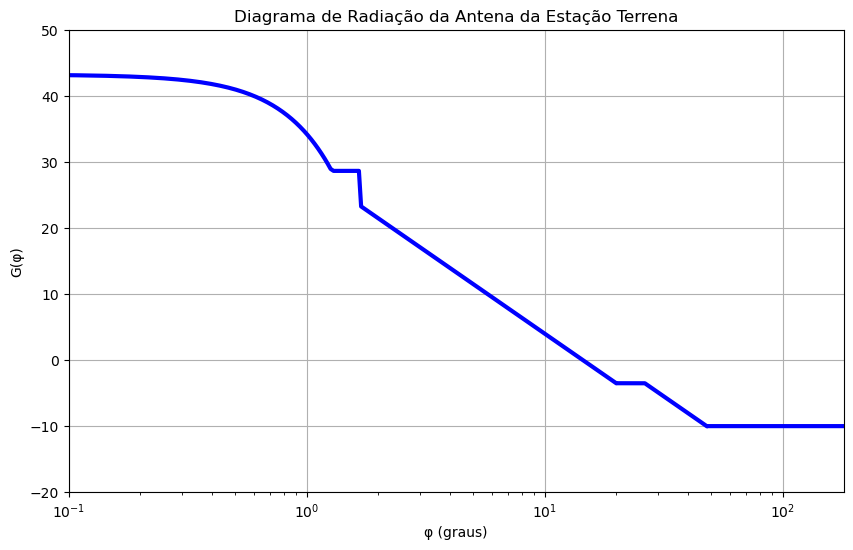

In [4]:
# Ângulos fora do eixo da antena (0 a 180 graus)
φ = np.linspace(0, 180, 5000)

# Calcular o ganho da antena
G = ganho_antena_art22_5c12(D, λ, φ)

# Plotar o diagrama da antena
plt.figure(figsize=(10, 6))
plt.semilogx(φ, G, linewidth=3, color='b')
plt.title('Diagrama de Radiação da Antena da Estação Terrena')
plt.xlabel('φ (graus)')
plt.ylabel('G(φ)')
plt.xlim(0.1, 180)
plt.ylim(-20, 50)
plt.grid(True)
plt.show()

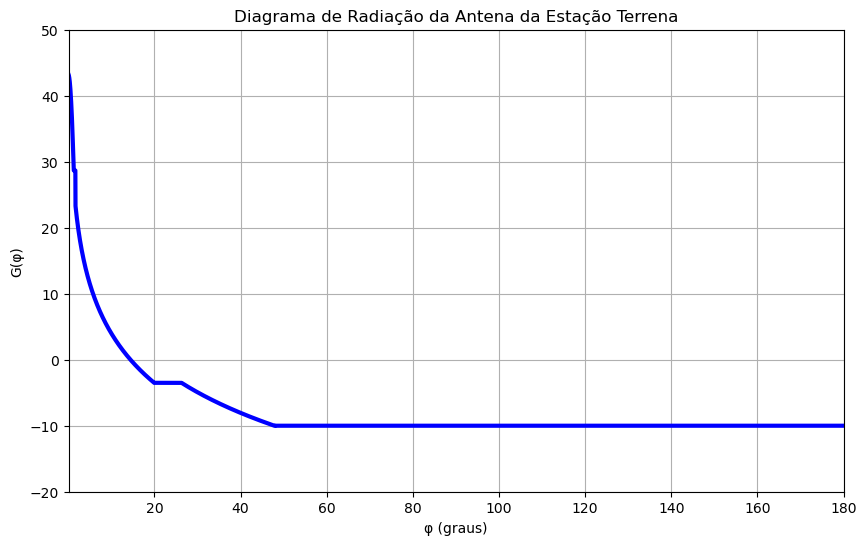

In [5]:
# Ângulos fora do eixo da antena (0 a 180 graus)
φ = np.linspace(0, 180, 5000)

# Calcular o ganho da antena
G = ganho_antena_art22_5c12(D, λ, φ)

# Plotar o diagrama da antena
plt.figure(figsize=(10, 6))
plt.plot(φ, G, linewidth=3, color='b')
plt.title('Diagrama de Radiação da Antena da Estação Terrena')
plt.xlabel('φ (graus)')
plt.ylabel('G(φ)')
plt.xlim(0.1, 180)
plt.ylim(-20, 50)
plt.grid(True)
plt.show()